# Featrue Scaling Machine Learning using Diamond Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Loading the dataset

In [3]:
df=pd.read_csv('Diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Removing the the column 'Unnamed: 0'

In [5]:
df.drop(columns = ['Unnamed: 0'],inplace = True)


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Chekcing the shape of the dataset after removing the first column

In [7]:
df.shape

(53940, 10)

### Checking the null values from the dataset

In [9]:
df.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### No Null values found in the dataset

### Checkcing the columns list

In [10]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# First step is spliting the data


In [11]:
# ----------------------------

Y = df['depth']
X = df.drop(columns = 'depth')

### Now splitting the data train and test using sklearn train-test-split



In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Now the data was seperated as categorical and conntinous trend.

In [15]:

X_cont = X[['carat','table','x','y','z']]
X_catg = X[['cut','color','clarity']]

In [16]:
X_cont_Train,X_cont_Test,X_catg_Train,X_catg_Test,Y_Train,Y_Test = train_test_split(X_cont , X_catg , Y,
                                                                              test_size = 0.20,
                                                                              random_state = 100)

In [17]:
X_cont_Train.shape,X_cont_Test.shape,X_catg_Train.shape,X_catg_Test.shape,len(Y_Train),len(Y_Test)


((43152, 5), (10788, 5), (43152, 3), (10788, 3), 43152, 10788)

In [18]:
X_cont_Train


,carat,table,x,y,z
27187,2.01,59.0,8.18,8.12,4.91
3118,0.79,55.9,5.88,5.95,3.67
49238,0.64,55.0,5.58,5.61,3.43
53575,0.70,56.0,5.73,5.63,3.56
29795,0.30,58.0,4.32,4.29,2.65
...,...,...,...,...,...
16304,1.07,59.0,6.49,6.52,4.09
79,0.26,59.0,4.06,4.09,2.55
12119,0.91,58.0,6.24,6.16,3.83
14147,1.25,58.0,6.89,6.85,4.29


### The arrays were copied in the form of train data and test data

In [20]:
before_Norm_Train = X_cont_Train.copy()
before_Norm_Test = X_cont_Test.copy()

### By applying the normalization technique We got the below values:

In [21]:
from sklearn.preprocessing import MinMaxScaler
normScaler = MinMaxScaler()
normScaler.fit_transform(X_cont_Train)

array([[0.37629938, 0.30769231, 0.76163873, 0.13786078, 0.60918114],
       [0.12266112, 0.24807692, 0.54748603, 0.10101868, 0.45533499],
       [0.09147609, 0.23076923, 0.51955307, 0.09524618, 0.42555831],
       ...,
       [0.14760915, 0.28846154, 0.58100559, 0.10458404, 0.4751861 ],
       [0.21829522, 0.28846154, 0.641527  , 0.11629881, 0.53225806],
       [0.03118503, 0.25      , 0.41992551, 0.07589134, 0.34615385]])

### Next step is to convert the above array into a DataFrame

In [22]:
X_cont_NormTrain = pd.DataFrame(normScaler.fit_transform(X_cont_Train),
                                columns = X_cont_Train.columns,
                                index = X_cont_Train.index)

X_cont_NormTrain

,carat,table,x,y,z
27187,0.376299,0.307692,0.761639,0.137861,0.609181
3118,0.122661,0.248077,0.547486,0.101019,0.455335
49238,0.091476,0.230769,0.519553,0.095246,0.425558
53575,0.103950,0.250000,0.533520,0.095586,0.441687
29795,0.020790,0.288462,0.402235,0.072835,0.328784
...,...,...,...,...,...
16304,0.180873,0.307692,0.604283,0.110696,0.507444
79,0.012474,0.307692,0.378026,0.069440,0.316377
12119,0.147609,0.288462,0.581006,0.104584,0.475186
14147,0.218295,0.288462,0.641527,0.116299,0.532258


### The arrays distribution was compared 'before scaling' and 'after scaling' using Histrogram and KDE plot

In [23]:
X_cont_norm_Test = pd.DataFrame(normScaler.fit_transform(X_cont_Test),
                                columns = X_cont_Test.columns,
                                index = X_cont_Test.index)

In [24]:
X_cont_norm_Test


,carat,table,x,y,z
52264,0.094148,0.296296,0.535,0.540102,0.103145
21073,0.244275,0.222222,0.675,0.691371,0.131132
42161,0.078880,0.333333,0.505,0.515736,0.100629
35974,0.055980,0.259259,0.483,0.494416,0.092453
7641,0.152672,0.333333,0.589,0.602030,0.116352
...,...,...,...,...,...
17694,0.256997,0.222222,0.679,0.693401,0.133019
22403,0.351145,0.370370,0.744,0.763452,0.143711
53573,0.127226,0.296296,0.571,0.570558,0.111950
7941,0.162850,0.370370,0.616,0.622335,0.115409


### Finally the saved dataframe was plotted using a histogramd and a KDE Plot

<Axes: ylabel='Count'>

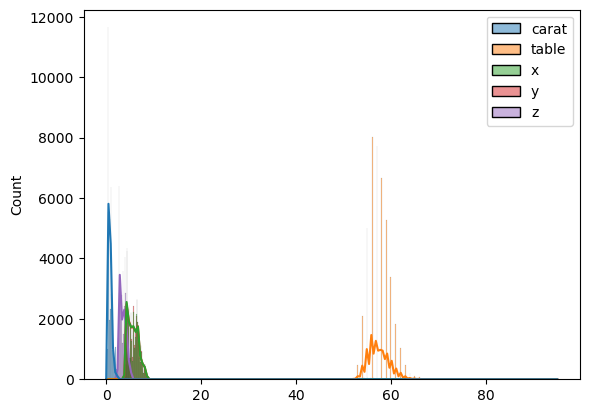

In [26]:
import seaborn as sns
sns.histplot(before_Norm_Train,kde = True)

<Axes: ylabel='Count'>

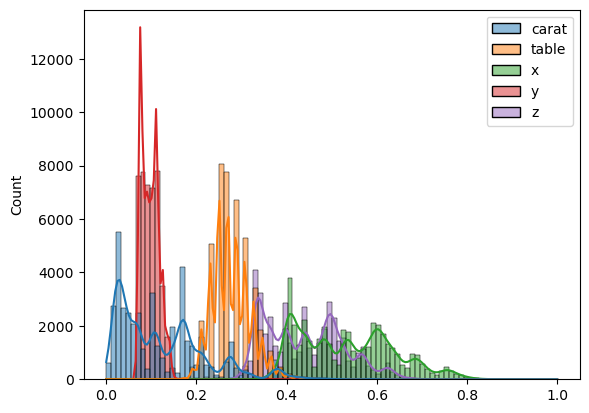

In [29]:
import seaborn as sns
sns.histplot(X_cont_NormTrain,kde = True)

### To be continued